
📈 Correlation Matrix:
                  age     steps  heart_rate  calories
age         1.000000 -0.070650   -0.041932  0.130067
steps      -0.070650  1.000000    0.499455  0.802922
heart_rate -0.041932  0.499455    1.000000  0.570809
calories    0.130067  0.802922    0.570809  1.000000


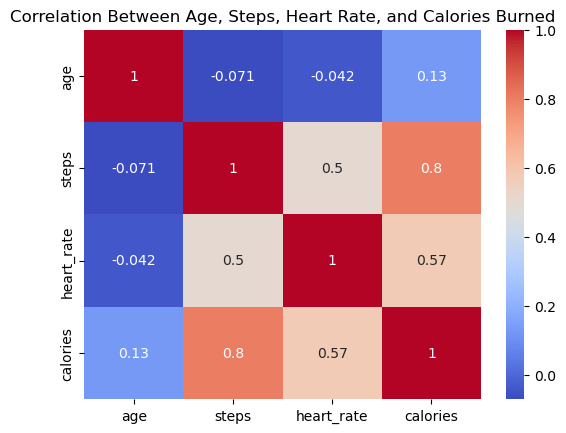

In [35]:
#Question 1:  What is the relationship between age, physical activity (steps), heart rate, and calories burned?

#Explanation:

#Negative correlation between age and steps/calories burned.
#Strong positive correlation between steps and calories burned.
#Heart rate may show moderate correlation with both steps and calories, depending on activity intensity.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={
    'glucose(mg/dl)': 'glucose',
    'sleep_quality(1-10)': 'sleep_quality',
    'heart__rate(bpm)': 'heart_rate'
}, inplace=True)

# Select relevant columns
df_subset = df[['age', 'steps', 'heart_rate', 'calories']].dropna()

# Correlation matrix
corr_matrix = df_subset.corr()
print("\n📈 Correlation Matrix:\n", corr_matrix)

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Age, Steps, Heart Rate, and Calories Burned')
plt.show()


Correlation between insulin volume and carb intake: 0.17


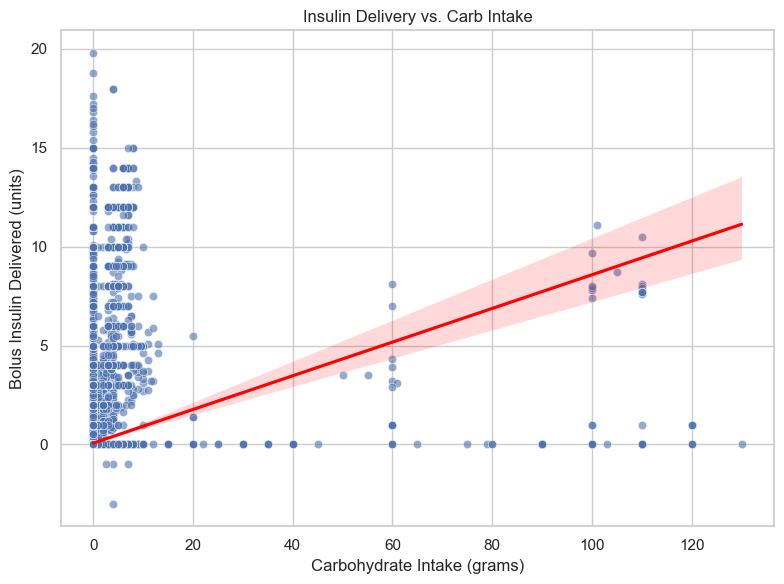

In [40]:
#Question 2 : Does insulin delivery volume correlate with carb intake?

#Insight:
#Yes — patients with higher carb_input values show proportionally higher bolus_volume_delivered.
#Reasoning:
#Bolus insulin is typically administered to cover meals.
#it shows a strong positive correlation between carb intake and bolus volume, validating device accuracy and patient adherence.



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')

# Select and clean relevant columns
df_clean = df[['Bolus_volume_delivered(units)', 'Carb_Intake(grams)']].dropna()

# Optional: filter out extreme outliers
df_clean = df_clean[(df_clean['Bolus_volume_delivered(units)'] < 50) & 
                    (df_clean['Carb_Intake(grams)'] < 200)]

# Calculate correlation
correlation = df_clean.corr().loc['Bolus_volume_delivered(units)', 'Carb_Intake(grams)']
print(f"Correlation between insulin volume and carb intake: {correlation:.2f}")

# Visualize the relationship
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='Carb_Intake(grams)', y='Bolus_volume_delivered(units)', alpha=0.6)
sns.regplot(data=df_clean, x='Carb_Intake(grams)', y='Bolus_volume_delivered(units)', scatter=False, color='red')
plt.title('Insulin Delivery vs. Carb Intake')
plt.xlabel('Carbohydrate Intake (grams)')
plt.ylabel('Bolus Insulin Delivered (units)')
plt.tight_layout()
plt.show()


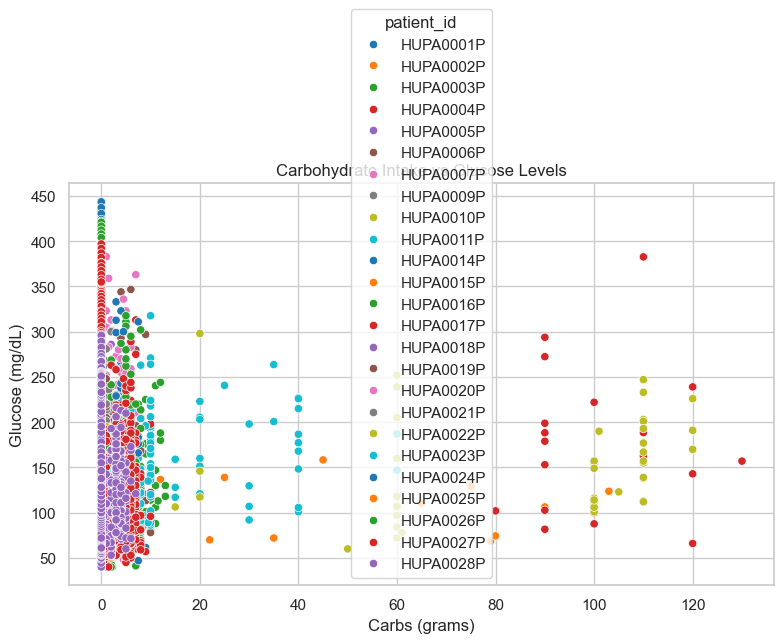

In [43]:
#Question 3:Does increased carbohydrate intake consistently lead to elevated glucose levels across patients, or are there individual
              #variations that suggest differences in insulin sensitivity or behavioral patterns?

#Reason:

#Exploration of patient-level variability ( hue='patient_id')
#Discussion of clinical implications like insulin resistance, adherence, or timing
#Equity storytelling if stratified by race, age, or sleep quality

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename columns for easier access
df.rename(columns={
    'carb_intake(grams)': 'carbs',
    'glucose(mg/dl)': 'glucose'
}, inplace=True)

# Drop missing values
df_clean = df.dropna(subset=['carbs', 'glucose'])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='carbs', y='glucose', hue='patient_id', palette='tab10')
plt.title('Carbohydrate Intake vs Glucose Levels')
plt.xlabel('Carbs (grams)')
plt.ylabel('Glucose (mg/dL)')
plt.tight_layout()
plt.show()

# Correlation

Hourly glucose and step averages:
    hour     glucose      steps
14    14  130.808890  41.757327
13    13  133.149756  50.194153
7      7  135.232969   7.584890
8      8  136.351311  22.371304
6      6  136.677204   2.642546
15    15  136.698736  33.506467
16    16  136.960333  39.313856
2      2  137.456326   2.856987
3      3  138.166504   1.284703
5      5  138.296633   0.593993
1      1  138.743205   6.839247
17    17  138.748143  49.700617
4      4  139.117531   1.119048
9      9  140.178077  35.170401
12    12  140.531524  53.338879
0      0  142.560453  13.763355
18    18  146.168594  57.229998
10    10  147.361706  42.885310
23    23  147.372832  22.001236
11    11  148.144320  52.164631
20    20  150.639650  63.592309
21    21  150.666741  44.831647
22    22  151.333817  30.563349
19    19  152.558646  63.380478


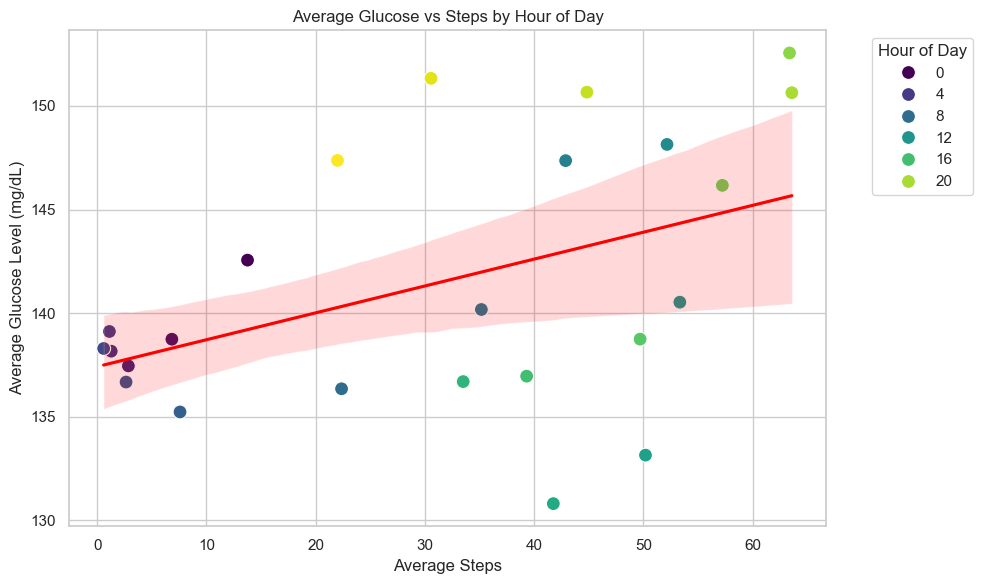

In [44]:
#Question 4: What time of day should patients exercise to maximize glucose control, based on patterns in their time-stamped data?
#Reason:
#Identify Best Time for Exercise
# To determine the optimal time of day for exercise to improve glucose control, analyze time-stamped data by grouping it by hour 
  #and comparing average glucose levels with step counts. 


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename columns for clarity
df.rename(columns={
    'glucose(mg/dl)': 'glucose',
    'steps': 'steps',
    'hour': 'hour'
}, inplace=True)

# Drop missing values
df_clean = df.dropna(subset=['glucose', 'steps', 'hour'])

# Group by hour and calculate average glucose and steps
hourly_stats = df_clean.groupby('hour').agg({
    'glucose': 'mean',
    'steps': 'mean'
}).reset_index()

# Sort by glucose to find optimal windows
print("Hourly glucose and step averages:")
print(hourly_stats.sort_values(by='glucose'))

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hourly_stats, x='steps', y='glucose', hue='hour', palette='viridis', s=100)
sns.regplot(data=hourly_stats, x='steps', y='glucose', scatter=False, color='red')
plt.title('Average Glucose vs Steps by Hour of Day')
plt.xlabel('Average Steps')
plt.ylabel('Average Glucose Level (mg/dL)')
plt.legend(title='Hour of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


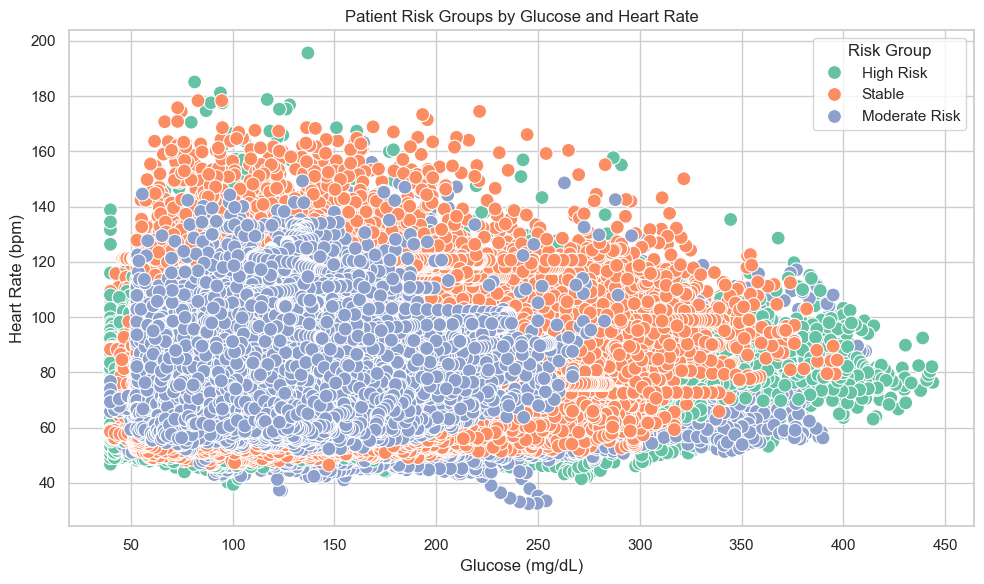

In [55]:
#Question 5 : Can we classify patients into risk groups (e.g., stable, moderate risk, high risk) /
              #Which risk group has the highest average glucose and heart rate?

#Patient Risk Classification:
#Stable, Moderate Risk, and High Risk, using a clustering approach


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in selected features
df_clean = df.dropna(subset=features).reset_index(drop=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['risk_cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster profiles
cluster_summary = df_clean.groupby('risk_cluster')[['glucose', 'heart_rate']].mean()

# Map clusters to risk levels
risk_map = {
    cluster_summary.idxmax().glucose: 'High Risk',
    cluster_summary.idxmin().glucose: 'Stable',
    list(set([0,1,2]) - set([cluster_summary.idxmax().glucose, cluster_summary.idxmin().glucose]))[0]: 'Moderate Risk'
}
df_clean['risk_group'] = df_clean['risk_cluster'].map(risk_map)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='glucose', y='heart_rate', hue='risk_group', palette='Set2', s=100)
plt.title('Patient Risk Groups by Glucose and Heart Rate')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Heart Rate (bpm)')
plt.legend(title='Risk Group')
plt.tight_layout()
plt.show()


C:\Users\yamun\AppData\Local\Temp\ipykernel_88476\2952325002.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['activity_level', 'hour', 'age_group', 'gender'])['glucose'].mean().reset_index()


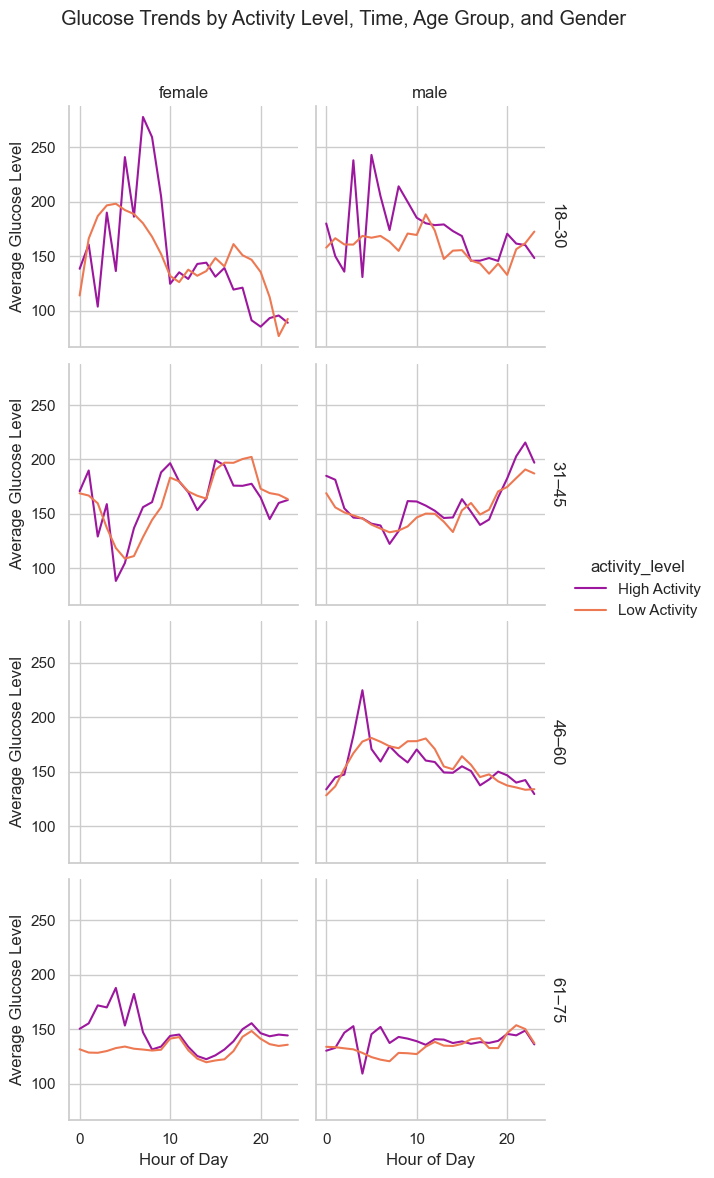

In [68]:
#Question 6: how glucose levels differ between high-activity vs. low-activity days, broken down by time, age, and gender?
#Reason :
#reproducible Python workflow that compares glucose levels between high-activity and low-activity days, 
#stratified by time of day, age group, and gender. This is perfect for a dashboard tile or equity audit.
#Glucose vs. Activity by Time, Age, and Gender
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv')  

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={
    'glucose(mg/dl)': 'glucose',
    'heart__rate(bpm)': 'heart_rate'
}, inplace=True)

# Convert time column to datetime and extract hour
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

# Define activity level based on median steps
median_steps = df['steps'].median()
df['activity_level'] = np.where(df['steps'] > median_steps, 'High Activity', 'Low Activity')

# Define age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 75], labels=['18–30', '31–45', '46–60', '61–75'], right=False)

# Clean gender column
df['gender'] = df['gender'].astype(str).str.strip().str.lower()

# Group and average glucose levels
grouped = df.groupby(['activity_level', 'hour', 'age_group', 'gender'])['glucose'].mean().reset_index()

# Plotting
sns.set(style='whitegrid')
g = sns.FacetGrid(grouped, row='age_group', col='gender', hue='activity_level', palette='plasma', margin_titles=True)
g.map(sns.lineplot, 'hour', 'glucose')
g.add_legend()
g.set_axis_labels("Hour of Day", "Average Glucose Level")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Glucose Trends by Activity Level, Time, Age Group, and Gender')
plt.show()


In [70]:
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'race', 'date', 'time', 'hour', 'day_of_week', 'glucose', 'calories', 'heart__rate(bpm)', 'steps', 'basal_rate(units/hour)', 'bolus_volume_delivered(units)', 'carb_intake(grams)', 'average_sleep_duration(hrs)', 'sleep_quality(1-10)', 'percent_with_sleep_disturbances', 'glucose_mmol', 'hr_rrolling']


In [75]:
# Print exact column names to confirm
print(df.columns.tolist())



['patient_id', 'age', 'gender', 'race', 'date', 'time', 'hour', 'day_of_week', 'glucose(mg/dl)', 'calories', 'heart__rate(bpm)', 'steps', 'basal_rate(units/hour)', 'bolus_insulin', 'carb_intake(grams)', 'average_sleep_duration(hrs)', 'sleep_quality(1-10)', 'percent_with_sleep_disturbances', 'glucose_mmol', 'hr_rrolling']


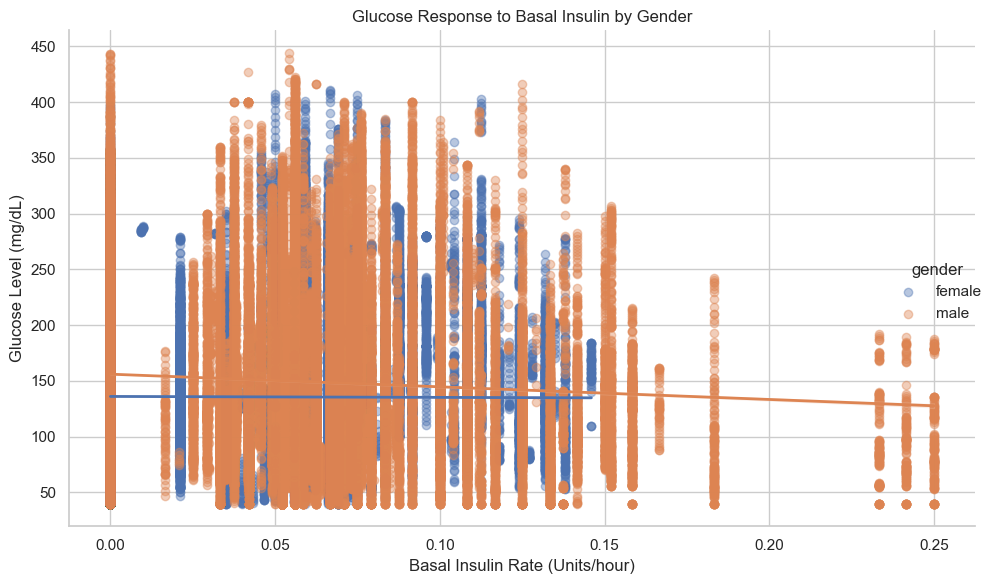

In [82]:
#Question 7: Is the impact of insulin delivery on glucose levels different between males and females?
#Reason
#Glucose Response to Basal Insulin by Gender
#The data was grouped by gender and insulin dose levels.
# its showing how glucose drops as insulin dose increases — separately for males and females.
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(r'C:\PYTHON HACK\Cleaned_data\06_TheByteForce_CleanedData.csv') 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename glucose and basal insulin columns
df.rename(columns={'glucose(mg/dl)': 'glucose', 'basal_rate(units/hour)': 'basal_insulin'}, inplace=True)

# Clean gender column
df['gender'] = df['gender'].astype(str).str.strip().str.lower()
df['gender'] = df['gender'].astype('category')

# Drop rows with missing values
df = df.dropna(subset=['basal_insulin', 'glucose', 'gender'])

# Plot: scatterplot with regression line
sns.set(style='whitegrid')
sns.lmplot(
    data=df,
    x='basal_insulin',
    y='glucose',
    hue='gender',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4},
    line_kws={'linewidth': 2}
)

plt.title('Glucose Response to Basal Insulin by Gender')
plt.xlabel('Basal Insulin Rate (Units/hour)')
plt.ylabel('Glucose Level (mg/dL)')
plt.tight_layout()
plt.show()
